https://seaborn.pydata.org/tutorial/color_palettes.html

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Building color palettes

### color_palette()

The most important function for working with discrete color palettes is color_palette(). This function provides an interface to many of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed).

color_palette() will accept the name of any seaborn palette or matplotlib colormap (except jet, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling color_palette() with no arguments will return the current default color cycle

In [19]:
sns.color_palette()

[(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
 (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
 (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
 (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
 (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

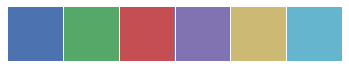

In [20]:
sns.palplot(sns.color_palette())

### set_palette()

A corresponding function, set_palette(), takes the same arguments and will set the default color cycle for all plots. You can also use color_palette() in a with statement to temporarily change the default palette

# Setting the default color palette

The color_palette() function has a companion called set_palette(). The relationship between them is similar to the pairs covered in the aesthetics tutorial. set_palette() accepts the same arguments as color_palette(), but it changes the default matplotlib parameters so that the palette is used for all plots.

In [47]:
sns.set_palette("husl")

# Qualitative (Categorical) color palettes

The first class is Qualitative (or categorical) palettes which are best when you want to distinguish discrete chunks of data that do not have an inherent ordering.

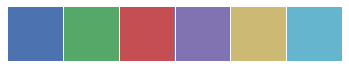

In [21]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.

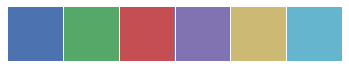

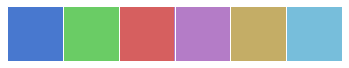

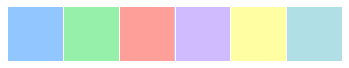

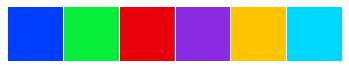

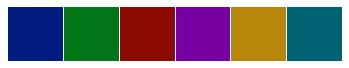

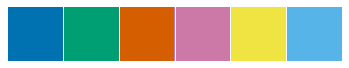

In [26]:
for item in ['deep', 'muted', 'pastel', 'bright', 'dark',  'colorblind']:
    sns.palplot(sns.color_palette(item))

### More than Six categories

The most common way to do this uses the hls color space, which is a simple transformation of RGB values.

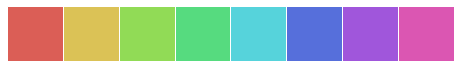

In [27]:
sns.palplot(sns.color_palette("hls", 8))

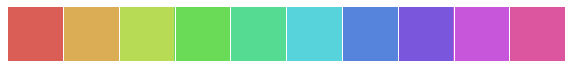

In [28]:
sns.palplot(sns.color_palette("hls", 10))

However, because of the way the human visual system works, colors that are even “intensity” in terms of their RGB levels won’t necessarily look equally intense. We perceive yellows and greens as relatively brighter and blues as relatively darker, which can be a problem when aiming for uniformity with the hls system.

To remedy this, seaborn provides an interface to the husl system, which also makes it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

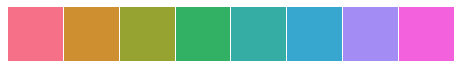

In [29]:
sns.palplot(sns.color_palette("husl", 8))

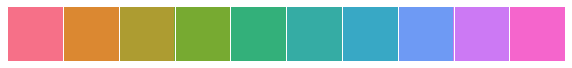

In [30]:
sns.palplot(sns.color_palette("husl", 10))

### Using categorical Color Brewer palettes - TD

### Using named colors from the xkcd color survey

xkcd produced a set of 954 named colors, which you can now reference in seaborn using the xkcd_rgb dictionary:
https://xkcd.com/color/rgb/

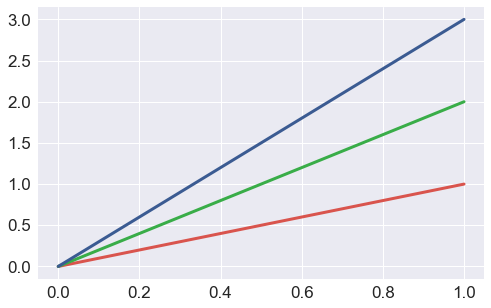

In [32]:
plt.figure(figsize = (8,5))
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3);

In addition to pulling out single colors from the xkcd_rgb dictionary, you can also pass a list of names to the xkcd_palette() function.

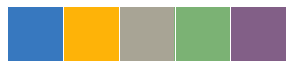

In [33]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

# Sequential color palettes

The second major class of color palettes is called “sequential”. This kind of color mapping is appropriate when data range from relatively low or unintersting values to relatively high or interesting values. Although there are cases where you will want discrete colors in a sequential palette, it’s more common to use them as a colormap in functions like kdeplot() or corrplot() (along with similar matplotlib functions).
- Don't use jet

For sequential data, it’s better to use palettes that have at most a relatively subtle shift in hue accompanied by a large shift in brightness and saturation. This approach will naturally draw the eye to the relatively important parts of the data.

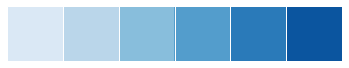

In [34]:
sns.palplot(sns.color_palette("Blues"))

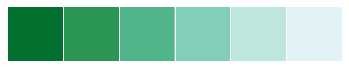

In [35]:
## if you want the lightness ramp to be reversed, you can add a _r suffix to the palette name.
sns.palplot(sns.color_palette("BuGn_r"))


### Sequential “cubehelix” palettes - TD

### Custom sequential palettes - TD

# Diverging color palettes

The third class of color palettes is called “diverging”. These are used for data where both large low and high values are interesting. There is also usually a well-defined midpoint in the data. For instance, if you are plotting changes in temperature from some baseline timepoint, it is best to use a diverging colormap to show areas with relative decreases and areas with relative increases.

The rules for choosing good diverging palettes are similar to good sequential palettes, except now you want to have two relatively subtle hue shifts from distinct starting hues that meet in an under-emphasized color at the midpoint. It’s also important that the starting values are of similar brightness and saturation.

It’s also important to emphasize here that using red and green should be avoided,

### Color Brewer palettes 

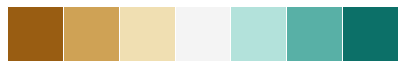

In [36]:
sns.palplot(sns.color_palette("BrBG", 7))

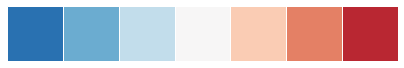

In [38]:
sns.palplot(sns.color_palette("RdBu_r", 7))

### coolwarm palette

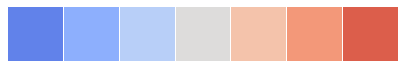

In [39]:
sns.palplot(sns.color_palette("coolwarm", 7))

### Custom diverging palettes

You can also use the seaborn function diverging_palette() to create a custom colormap for diverging data. This function makes diverging palettes using the husl color system. You pass it two hues (in degrees) and, optionally, the lightness and saturation values for the extremes. Using husl means that the extreme values, and the resulting ramps to the midpoint, will be well-balanced

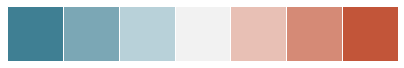

In [40]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

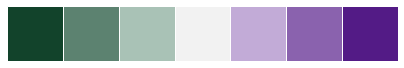

In [41]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

The sep argument controls the width of the separation between the two ramps in the middle region of the palette.

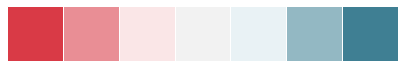

In [42]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

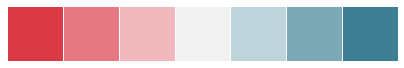

In [46]:
sns.palplot(sns.diverging_palette(10, 220, sep=20, n=7))

# Setting the default color palette